In [1]:
import matplotlib.pyplot as plt

from datetime import date, time, datetime

import tensorflow as tf

from numba import jit, njit

from dask.diagnostics import ProgressBar

import numpy as np

import pandas as pd

low_memory = False

2021-08-09 22:12:46.394655: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
path = "weather.csv"

In [3]:
weather = pd.read_csv(path, encoding = "ISO-8859-1")

In [ ]:
weather.head(5)

In [5]:
def rename_columns_df(df):
    dd = df.to_numpy()
    del df
    dd = pd.DataFrame(dd, columns = ['DATA', 'HORA_UTC', 
                            'PRECIPITACAO_TOTAL_HORARIO_mm', 
                            'PRESSAO_ATMOSFERICA_NIVEL_DA_ESTACAO_HORARIA_mB',
                            'PRESSAO_ATMOSFERICA_MAX_NA_HORA_ANT_AUT_mB',
                            'PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_mB', 
                            'RADIACAO_GLOBAL', 
                            'TEMPERATURA_DO_AR_BULBO_SECO_HORARIA',
                            'TEMPERATURA_PONTO_DE_ORVALHO', 
                            'TEMPERATURA_MAX_NA_HORA_ANT_AUT',
                            'TEMPERATURA_MIN_NA_HORA_ANT_AUT',
                            'TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT',
                            'TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT_AUT',
                            'UMIDADE_REL_MAX_NA_HORA_ANT_AUT_porcent', 
                            'UMIDADE_REL_MIN_NA_HORA_ANT_AUT_porcent', 
                            'UMIDADE_RELATIVA_DO_AR_HORARIA_porcent',
                            'VENTO_DIRECAO_HORARIA', 
                            'VENTO_RAJADA_MAX',
                            'VENTO_VELOCIDADE_HORARIA',   
                            'REGIAO', 'UF', 'ESTACAO', 'CODIGO_WMO',
                            'LATITUDE', 'LONGITUDE', 'ALTITUDE', 
                            'DATA_FUNDACAO'], index = None)

    return dd

In [6]:
weather = rename_columns_df(weather21)

In [7]:
db0 = weather.replace(",", ".", regex = True) # quero que substitua todas as ',' por '.', mas tem que haver numero depois da ','

del weather

In [8]:
db = db0.replace("-9999", 0, regex = True)
del db0

In [9]:
db['DATA'] = db['DATA'].astype(str)
db['HORA_UTC'] = db['HORA_UTC'].astype(str)
db['PRECIPITACAO_TOTAL_HORARIO_mm'] = db['PRECIPITACAO_TOTAL_HORARIO_mm'].astype(float)
db['PRESSAO_ATMOSFERICA_NIVEL_DA_ESTACAO_HORARIA_mB'] = db['PRESSAO_ATMOSFERICA_NIVEL_DA_ESTACAO_HORARIA_mB'].astype(float)
db['PRESSAO_ATMOSFERICA_MAX_NA_HORA_ANT_AUT_mB'] = db['PRESSAO_ATMOSFERICA_MAX_NA_HORA_ANT_AUT_mB'].astype(float)
db['PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_mB'] = db['PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_mB'].astype(float)
db['RADIACAO_GLOBAL'] = db['RADIACAO_GLOBAL'].astype(float)
db['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA'] = db['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA'].astype(float)
db['TEMPERATURA_PONTO_DE_ORVALHO'] = db['TEMPERATURA_PONTO_DE_ORVALHO'].astype(float)
db['TEMPERATURA_MAX_NA_HORA_ANT_AUT'] = db['TEMPERATURA_MAX_NA_HORA_ANT_AUT'].astype(float)
db['TEMPERATURA_MAX_NA_HORA_ANT_AUT'] = db['TEMPERATURA_MAX_NA_HORA_ANT_AUT'].astype(float)
db['TEMPERATURA_MIN_NA_HORA_ANT_AUT'] = db['TEMPERATURA_MIN_NA_HORA_ANT_AUT'].astype(float)
db['TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT'] = db['TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT'].astype(float)
db['TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT_AUT'] = db['TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT_AUT'].astype(float)
db['UMIDADE_REL_MAX_NA_HORA_ANT_AUT_porcent'] = db['UMIDADE_REL_MAX_NA_HORA_ANT_AUT_porcent'].astype(float)
db['UMIDADE_REL_MIN_NA_HORA_ANT_AUT_porcent'] = db['UMIDADE_REL_MIN_NA_HORA_ANT_AUT_porcent'].astype(float)
db['UMIDADE_RELATIVA_DO_AR_HORARIA_porcent'] = db['UMIDADE_RELATIVA_DO_AR_HORARIA_porcent'].astype(float)
db['VENTO_DIRECAO_HORARIA'] = db['VENTO_DIRECAO_HORARIA'].astype(float)
db['VENTO_RAJADA_MAX'] = db['VENTO_RAJADA_MAX'].astype(float)
db['VENTO_VELOCIDADE_HORARIA'] = db['VENTO_VELOCIDADE_HORARIA'].astype(float)
db['REGIAO'] = db['REGIAO'].astype(str)
db['ESTACAO'] = db['ESTACAO'].astype(str)
db['CODIGO_WMO'] = db['CODIGO_WMO'].astype(str)
db['LATITUDE'] = db['LATITUDE'].astype(str)
db['LONGITUDE'] = db['LONGITUDE'].astype(str)
db['ALTITUDE'] = db['ALTITUDE'].astype(str)
db['DATA_FUNDACAO'] = db['DATA_FUNDACAO'].astype(str)


In [10]:
db.dtypes

DATA                                                object
HORA_UTC                                            object
PRECIPITACAO_TOTAL_HORARIO_mm                      float64
PRESSAO_ATMOSFERICA_NIVEL_DA_ESTACAO_HORARIA_mB    float64
PRESSAO_ATMOSFERICA_MAX_NA_HORA_ANT_AUT_mB         float64
PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_mB         float64
RADIACAO_GLOBAL                                    float64
TEMPERATURA_DO_AR_BULBO_SECO_HORARIA               float64
TEMPERATURA_PONTO_DE_ORVALHO                       float64
TEMPERATURA_MAX_NA_HORA_ANT_AUT                    float64
TEMPERATURA_MIN_NA_HORA_ANT_AUT                    float64
TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT            float64
TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT_AUT            float64
UMIDADE_REL_MAX_NA_HORA_ANT_AUT_porcent            float64
UMIDADE_REL_MIN_NA_HORA_ANT_AUT_porcent            float64
UMIDADE_RELATIVA_DO_AR_HORARIA_porcent             float64
VENTO_DIRECAO_HORARIA                              float

In [11]:
columns_with_numeric_type = ['PRECIPITACAO_TOTAL_HORARIO_mm', 
                            'PRESSAO_ATMOSFERICA_NIVEL_DA_ESTACAO_HORARIA_mB',
                            'PRESSAO_ATMOSFERICA_MAX_NA_HORA_ANT_AUT_mB',
                            'PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_mB', 
                            'RADIACAO_GLOBAL', 
                            'TEMPERATURA_DO_AR_BULBO_SECO_HORARIA',
                            'TEMPERATURA_PONTO_DE_ORVALHO', 
                            'TEMPERATURA_MAX_NA_HORA_ANT_AUT',
                            'TEMPERATURA_MIN_NA_HORA_ANT_AUT',
                            'TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT',
                            'TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT_AUT',
                            'UMIDADE_REL_MAX_NA_HORA_ANT_AUT_porcent', 
                            'UMIDADE_REL_MIN_NA_HORA_ANT_AUT_porcent', 
                            'UMIDADE_RELATIVA_DO_AR_HORARIA_porcent',
                            'VENTO_DIRECAO_HORARIA', 
                            'VENTO_RAJADA_MAX',
                            'VENTO_VELOCIDADE_HORARIA']

In [12]:
def fillna_with_mean(series):
    try:
        s0 = series.dropna()        
        m = s0.mean()

        try:
            s = series.fillna(m)
            return s
                
        except ValueError:
            raise ValueError ("Falha em substituir nan por média!")
    
    except:
        print("Falha calcular média!")

In [13]:
def process_fillna(columns_with_numeric_type, data):
    new_data = data.copy()
    with ProgressBar():
        for column in columns_with_numeric_type:
            serie = fillna_with_mean(new_data[column])
            assert serie.isna().sum() == 0

            new_data = new_data.drop([column], axis = 1)
            serie = pd.DataFrame(serie, columns = [column])
            new_data = pd.concat([new_data, serie], axis = 1)
        
    del data
        
    return new_data

In [14]:
cd = process_fillna(columns_with_numeric_type, db)

In [15]:
db = cd.copy()

In [ ]:
db.head(2)

In [17]:
def reorder_columns(db):
    db = db[['DATA', 'HORA_UTC', 'PRECIPITACAO_TOTAL_HORARIO_mm', 
                    'PRESSAO_ATMOSFERICA_NIVEL_DA_ESTACAO_HORARIA_mB',
                    'PRESSAO_ATMOSFERICA_MAX_NA_HORA_ANT_AUT_mB',
                    'PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_mB', 
                    'RADIACAO_GLOBAL', 
                    'TEMPERATURA_DO_AR_BULBO_SECO_HORARIA',
                    'TEMPERATURA_PONTO_DE_ORVALHO', 
                    'TEMPERATURA_MAX_NA_HORA_ANT_AUT',
                    'TEMPERATURA_MIN_NA_HORA_ANT_AUT',
                    'TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT',
                    'TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT_AUT',
                    'UMIDADE_REL_MAX_NA_HORA_ANT_AUT_porcent', 
                    'UMIDADE_REL_MIN_NA_HORA_ANT_AUT_porcent', 
                    'UMIDADE_RELATIVA_DO_AR_HORARIA_porcent',
                    'VENTO_DIRECAO_HORARIA', 
                    'VENTO_RAJADA_MAX',
                    'VENTO_VELOCIDADE_HORARIA',   
                    'REGIAO', 'UF', 'ESTACAO', 'CODIGO_WMO',
                    'LATITUDE', 'LONGITUDE', 'ALTITUDE', 
                    'DATA_FUNDACAO']]

    return db

In [18]:
def join_time(dates, hours):
    s0 = dates.to_numpy()
    s1 = hours.to_numpy()
    result = []

    for row in range(len(s0)):
        result.append(datetime.combine(s0[row], s1[row]))

    del dates, hours, s0, s1

    return pd.DataFrame(result, columns= ['TIMESTAMP'], index= None)

In [19]:
db = reorder_columns(db)

In [ ]:
db['HORA_UTC'] = db['HORA_UTC'].map(lambda v: v[:2] + ':' + v[2:4])
db['HORA_UTC'] = db['HORA_UTC'].map(lambda h: time(hour = int(h[:2]), minute = int(h[3:5])))
db['DATA'] = db['DATA'].map(lambda d: date(int(d[:4]), int(d[5:7]), int(d[8:])))
db['TIMESTAMP'] = join_time(db['DATA'], db['HORA_UTC'])
db['TIMESTAMP'] = pd.to_datetime(db['TIMESTAMP'])
db = db.drop(['DATA', 'HORA_UTC'], axis = 1)

In [26]:
date_time = pd.to_datetime(db.pop('TIMESTAMP'))

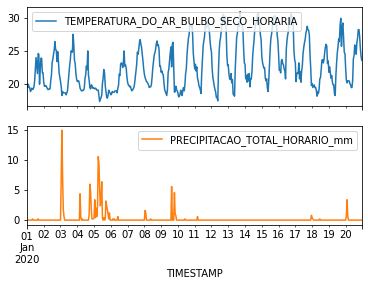

In [27]:
plot_cols = ['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA', 'PRECIPITACAO_TOTAL_HORARIO_mm']
plot_features = db[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots = True)

In [28]:
db.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PRECIPITACAO_TOTAL_HORARIO_mm,6870096.0,0.168820,1.123727,0.0,0.000000,0.000000,0.168820,96.0
PRESSAO_ATMOSFERICA_NIVEL_DA_ESTACAO_HORARIA_mB,6870096.0,962.313126,33.444494,720.1,951.000000,962.313126,984.000000,1048.7
PRESSAO_ATMOSFERICA_MAX_NA_HORA_ANT_AUT_mB,6870096.0,962.586653,33.428742,720.3,951.300000,962.586653,984.200000,1049.8
PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_mB,6870096.0,962.027188,33.429663,720.0,950.800000,962.027188,983.600000,1041.5
RADIACAO_GLOBAL,6870096.0,1349.190336,737.004023,0.0,1349.190336,1349.190336,1349.190336,6895.3
TEMPERATURA_DO_AR_BULBO_SECO_HORARIA,6870096.0,23.401702,5.130148,-51.4,21.700000,23.401702,25.600000,44.7
TEMPERATURA_PONTO_DE_ORVALHO,6870096.0,17.251517,4.594555,-59.0,16.300000,17.251517,19.900000,35.0
TEMPERATURA_MAX_NA_HORA_ANT_AUT,6870096.0,24.069445,5.232595,-51.2,22.300000,24.069445,26.300000,44.8
TEMPERATURA_MIN_NA_HORA_ANT_AUT,6870096.0,22.749756,5.010851,-51.6,21.200000,22.749756,24.900000,43.4
TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT,6870096.0,17.817997,4.553773,-58.7,16.900000,17.817997,20.400000,35.7


In [29]:
wind = db['VENTO_DIRECAO_HORARIA']
max_wind = db['VENTO_RAJADA_MAX']

In [ ]:
bad_wind = wind == -9999.0
wind[bad_wind] = 0.0

bad_max_wind = max_wind == -9999.0
max_wind[bad_max_wind] = 0.0

In [31]:
db['VENTO_DIRECAO_HORARIA'].min()

1.0

In [32]:
wind_dir = db['VENTO_DIRECAO_HORARIA'][:7500]
wind_vel = db['VENTO_VELOCIDADE_HORARIA'][:7500]

Text(0, 0.5, 'Velocidade do Vento (m/s)')

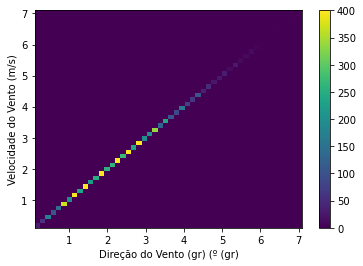

In [33]:
plt.hist2d(wind_vel, wind_vel, bins = (50, 50), vmax = 400)
plt.colorbar()
plt.xlabel('Direção do Vento (gr) (º (gr)')
plt.ylabel('Velocidade do Vento (m/s)')

In [34]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [35]:
day = 24*60*60
year = (365.2425) * day

db['DIA SENO'] = np.sin(timestamp_s * (2* np.pi / day))
db['DIA COS'] = np.cos(timestamp_s * (2* np.pi / day))

db['ANO SENO'] = np.sin(timestamp_s * (2* np.pi / year))
db['ANO COS'] = np.cos(timestamp_s * (2* np.pi / year))

Text(0, 0.5, 'Sinal da hora do dia')

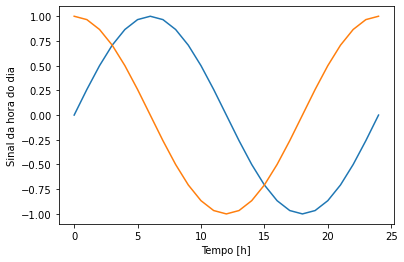

In [36]:
plt.plot(db['DIA SENO'][:25])
plt.plot(db['DIA COS'][:25])
plt.xlabel('Tempo [h]')
plt.ylabel('Sinal da hora do dia')

In [ ]:
fft = tf.signal.rfft(db['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(db['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset

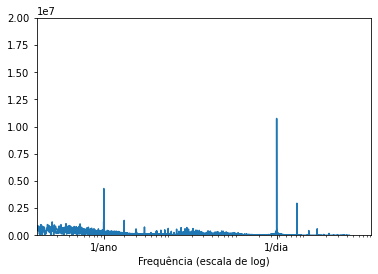

In [42]:
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 20000000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels = ['1/ano', '1/dia'])
_ = plt.xlabel("Frequência (escala de log)")

In [43]:
path_save = "pre_processed20_21.csv"

In [44]:
db.to_csv(path_save, index = None)